# Lesson 6 Assignment - Advertising Sales Regression

## Author - Trupti Gandhi



### Instructions  
Perform four different linear regressions on advertising sales data located in 'Advertising.csv'.  Your dependent feature is 'sales', a measure of sales of a product in a given market in thousands of dollars. 

The independent features for each of the first 3 separate regressions are:

 1. 'TV': advertising dollars spent on TV ads for a single product in a given market.
 2. 'radio': advertising dollars spent radio ads.
 3. 'newspaper': advertising dollars spent on newspaper ads.

For the first 3 linear regression performed:

- Produce a labeled graph showing the best fit line with the data points.
- Interpret both the slope and y-intercept.
 
The final regression(#4) includes all 3 features: (a) TV, (b) radio, and (c) newspaper. 
- Interpret each partial slope and the intercept parameters.
- Interpret the adjusted R-squared.
- Find and report the mean-squared error.

#### Please prepare this information for a client who may not understand what the parameters mean.


In [32]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
# Load data
#filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Advertising.csv'
ad_data = pd.read_csv(r"C:\Users\Gandhi\Desktop\Method_For_Data_Analysys\CH6\Advertising.csv")
#Automobile.head(10)
#ad_data = pd.read_csv(filename, index_col=0)
print(ad_data.head())
print(ad_data.shape)


   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
(200, 5)


What are the features?

- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the response?

- Sales: sales of a single product in a given market (in thousands of widgets)

In [34]:
print(ad_data.dtypes)

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object


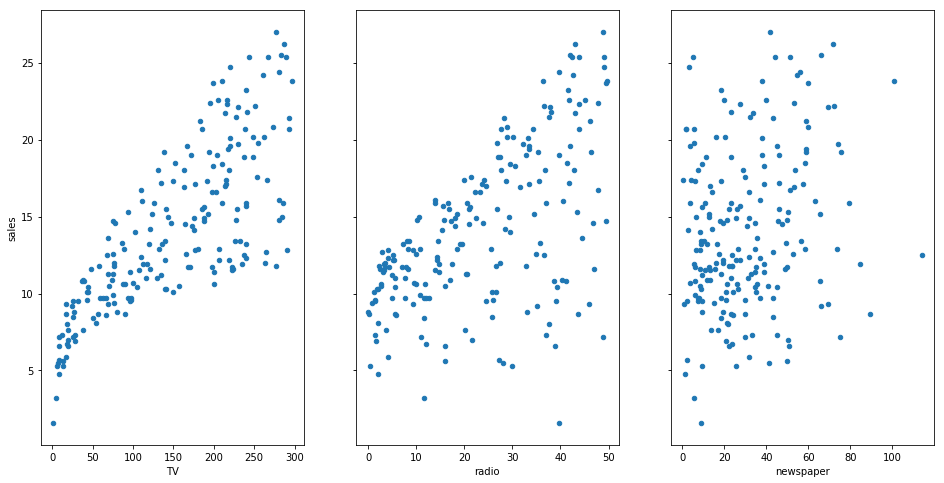

In [35]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
ad_data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
ad_data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
ad_data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

#### Questions About the Advertising Data

- 1.On the basis of this data, how should we spend our advertising money in the future?
- 2 This general question might lead you to more specific questions:
- 3.Is there a relationship between ads and sales?
- 4.How strong is that relationship?
- 5.Which ad types contribute to sales?
- 6.What is the effect of each ad type of sales?
- 7.Given ad spending in a particular market, can sales be predicted?

We will explore these questions below

In [36]:
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [37]:
# Add scaled x to data frame
ad_data['TV_scale'] = scale(ad_data['TV'])

ad_data.head()

,Unnamed: 0,TV,radio,newspaper,sales,TV_scale
0,1,230.1,37.8,69.2,22.1,0.969852
1,2,44.5,39.3,45.1,10.4,-1.197376
2,3,17.2,45.9,69.3,9.3,-1.516155
3,4,151.5,41.3,58.5,18.5,0.052050
4,5,180.8,10.8,58.4,12.9,0.394182


Intercept: 7.03259
Slope : 0.04754


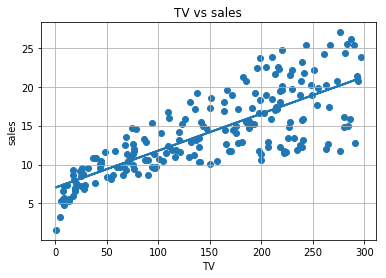

In [38]:
from sklearn import linear_model
# from sklearn.linear_model import LinearRegression

# First initialize the model.
linear_model = linear_model.LinearRegression()
n_points = 200
# Fit the model to the data
x_input = ad_data['TV'].values.reshape(n_points, 1) # the reshape is required by sklearn
y_output = ad_data['sales'].values.reshape(n_points, 1)
linear_model.fit(x_input, y_output)

# Get predictions
y_pred = linear_model.predict(x_input)

# Plot output
plt.scatter(x_input, y_output)
plt.plot(x_input, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('TV')
plt.ylabel('sales')
plt.title('TV vs sales')

# Print model parameters
# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(linear_model.intercept_[0]))
print('Slope : {0:.5f}'.format(linear_model.coef_[0][0]))

#### Interpreting Model Coefficients

A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales.
Or more clearly: An additional $1,000 spent on TV ads is associated with an increase in sales of 47.537 widgets.

Residuals: differences between what the model predicts for each data point and the actual value of each data point. We can extract the model's residuals by making a prediction with the model on the data and then subtracting the actual value from each prediction:

In [39]:
# Add predicted to pandas dataframe
ad_data['predicted'] = y_pred
# Add residuals to pandas dataframe
# residual := difference between actual value and the predicted value
ad_data['resids'] = y_output - y_pred

# View head of data frame
ad_data.head()

,Unnamed: 0,TV,radio,newspaper,sales,TV_scale,predicted,resids
0,1,230.1,37.8,69.2,22.1,0.969852,17.970775,4.129225
1,2,44.5,39.3,45.1,10.4,-1.197376,9.147974,1.252026
2,3,17.2,45.9,69.3,9.3,-1.516155,7.850224,1.449776
3,4,151.5,41.3,58.5,18.5,0.052050,14.234395,4.265605
4,5,180.8,10.8,58.4,12.9,0.394182,15.627218,-2.727218


In [40]:
ad_data['resids'].describe()

count    2.000000e+02
mean    -1.638689e-15
std      3.250458e+00
min     -8.385982e+00
25%     -1.954522e+00
50%     -1.912655e-01
75%      2.067109e+00
max      7.212369e+00
Name: resids, dtype: float64

In [41]:
[InternetShortcut]
URL=http://localhost:8888/notebooks/Desktop/Method_For_Data_Analysys/CH6/Trupti_Gandhi-L06-AdRegression_Final.ipynb#Using-Statsmodel
# What are the coefficients?  (m = slope, and b = y-intercept)
m = linear_model.coef_[0]
b = linear_model.intercept_
print('Slope m = {}'.format(m[0]))
print('Intercept b = {}'.format(b[0]))

Slope m = 0.047536640433019764
Intercept b = 7.032593549127693


#### Using Statsmodel

Intercept, Slope : Intercept    7.032594
TV           0.047537
dtype: float64

SSE, SST, SSR, and RMSE:
SSE: 3314.6181668686486
SST: 5417.14875
SSR: 2102.5305831313517
RMSE: 57.57272068322504
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 17 May 2018   Prob (F-statistic):           1.47e-42
Time:                        17:48:50   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 c

Text(0.5,1,'TV vs Sales')

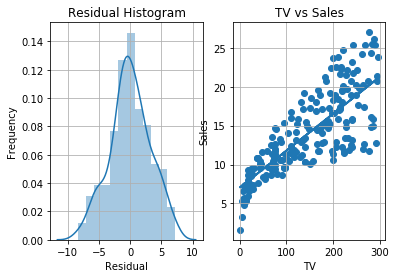

In [42]:
import statsmodels.formula.api as sm
import seaborn as sns

ols_model = sm.ols(formula = 'sales ~ TV', data=ad_data)
# Alternatively:
#ols_model = sm.OLS(y_output, sm.add_constant(x_input))

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept, Slope : {}'.format(results.params))

print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())


plt.subplot(1, 2, 1)
sns.distplot(results.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

plt.subplot(1, 2, 2)
plt.scatter(x_input, y_output)
plt.plot(x_input, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')

The output above shows the model intercept and coefficients used to create the best fit line. In this case the y-intercept term is set to  7.032594 and the coefficient for the weight variable is   0.047537.

#### Interpreting Model Coefficients

A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales.
Or more clearly: An additional $1,000 spent on TV ads is associated with an increase in sales of 47.537 widgets.

#### Model with scaled Data

Intercept: 14.02250
Slope : 4.07101


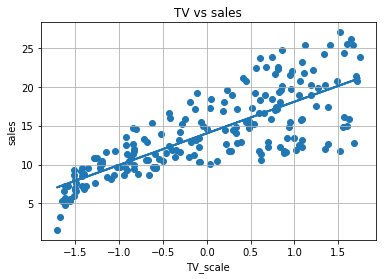

In [43]:
from sklearn import linear_model
# from sklearn.linear_model import LinearRegression

# First initialize the model.
linear_model = linear_model.LinearRegression()
n_points = 200
# Fit the model to the data
x_input = ad_data['TV_scale'].values.reshape(n_points, 1) # the reshape is required by sklearn
y_output = ad_data['sales'].values.reshape(n_points, 1)
linear_model.fit(x_input, y_output)

# Get predictions
y_pred = linear_model.predict(x_input)

# Plot output
plt.scatter(x_input, y_output)
plt.plot(x_input, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('TV_scale')
plt.ylabel('sales')
plt.title('TV vs sales')

# Print model parameters
# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(linear_model.intercept_[0]))
print('Slope : {0:.5f}'.format(linear_model.coef_[0][0]))

In [44]:
# What are the coefficients?  (m = slope, and b = y-intercept)
m = linear_model.coef_[0]
b = linear_model.intercept_
print('Slope m = {}'.format(m[0]))
print('Intercept b = {}'.format(b[0]))

Slope m = 4.071006120646745
Intercept b = 14.0225


Intercept, Slope : Intercept    14.022500
x             4.071006
dtype: float64

SSE, SST, SSR, and RMSE:
SSE: 3314.6181668686495
SST: 5417.14875
SSR: 2102.530583131351
RMSE: 57.57272068322505
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 17 May 2018   Prob (F-statistic):           1.47e-42
Time:                        17:48:51   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 

Text(0.5,1,'TV_Scale vs sales')

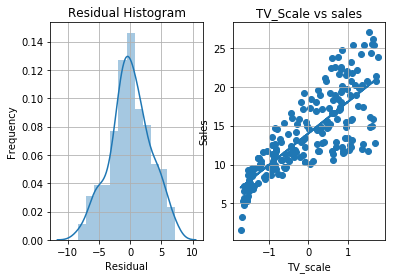

In [45]:
import statsmodels.formula.api as sm
import seaborn as sns

y= ad_data['sales']
x= ad_data['TV_scale']

ols_model = sm.ols(formula = 'y ~ x', data=ad_data)
# Alternatively:
#ols_model = sm.OLS(y_output, sm.add_constant(x_input))

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept, Slope : {}'.format(results.params))

print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())


plt.subplot(1, 2, 1)
sns.distplot(results.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

plt.subplot(1, 2, 2)
plt.scatter(x_input, y_output)
plt.plot(x_input, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('TV_scale')
plt.ylabel('Sales')
plt.title('TV_Scale vs sales')

#### Interpreting Model Coefficients

Intercept has increased with scaled data.

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here R -square value is 0.612

C:\Users\Gandhi\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


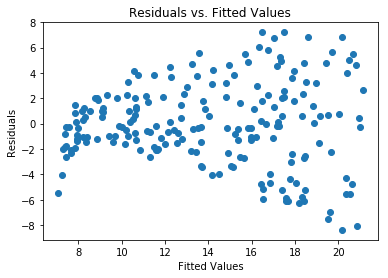

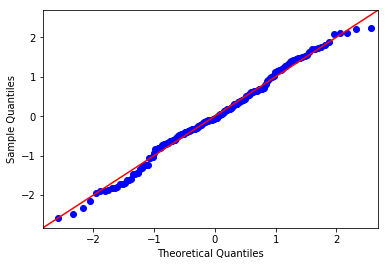

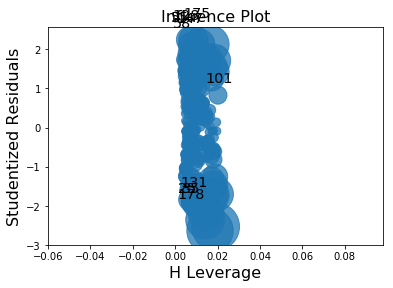

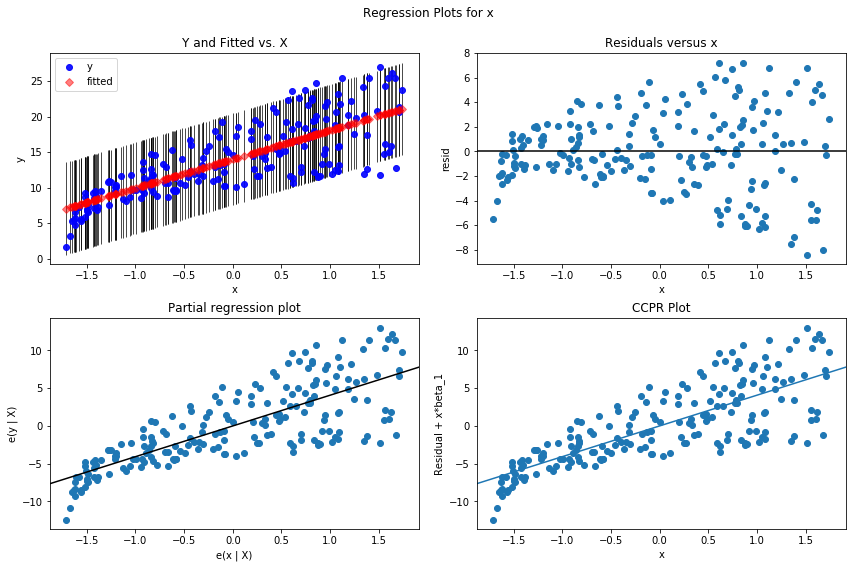

In [46]:
# Summary graphs:
import scipy.stats as stats
import statsmodels.api as statsmodels
from statsmodels.graphics.regressionplots import *
x= ad_data['TV_scale']

# Residuals vs Fitted Values
residuals = results.resid
fitted_vals = results.predict(ad_data['TV_scale'])
plt.plot(fitted_vals, residuals, 'o')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Create Q-Q Normal Plot of the Residuals
statsmodels.qqplot(residuals, stats.norm, fit=True, line='45')

# Fitted Values vs. Square Root of the Standardized Residuals
standardized_resid = (results.resid - np.min(results.resid)) / np.max(results.resid)

# Leverage Plot (Cook's Distance)
influence_plot(results)

# Additional stats models plots
fig = plt.figure(figsize=(12,8))
fig = statsmodels.graphics.plot_regress_exog(results, "x", fig=fig)

When residuals are normally distributed, they tend to lie along the straight line on the Q-Q plot. In this case residuals appear to follow a slightly non-linear pattern: the residuals are bowed a bit away from the normality line on each end. This is an indication that simple straight line might not be sufficient to fully describe the relationship between sales and TV

###  Polynomial Curve for Radio 

Variables often exhibit non-linear relationships that can't be fit well with a straight line. In these cases, we can use linear regression to fit a curved line the data by adding extra higher order terms (squared, cubic, etc.) to the model. A linear regression that involves higher order terms is known as "polynomial regression."

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     49.03
Date:                Thu, 17 May 2018   Prob (F-statistic):           5.23e-18
Time:                        17:48:59   Log-Likelihood:                -573.29
No. Observations:                 200   AIC:                             1153.
Df Residuals:                     197   BIC:                             1162.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.9144      0.466     29.860      0.0

Text(0.5,1,'radio vs sales (Polynomial)')

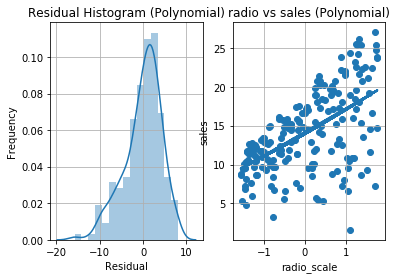

In [47]:
# Add scaled x to data frame
ad_data['radio_scale'] = scale(ad_data['radio'])
ad_data.head()

x=ad_data['radio_scale']
y= ad_data['sales']
mod_poly = sm.ols(formula = 'y ~ x + I(x**2)', data = ad_data).fit()

# Get most of the linear regression statistics we are interested in:
print(mod_poly.summary())

# Plot a histogram of the residuals
y_pred_poly = mod_poly.predict(ad_data['radio_scale'])

plt.subplot(1, 2, 1)
sns.distplot(mod_poly.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram (Polynomial)')

plt.subplot(1, 2, 2)
plt.scatter(ad_data['radio_scale'], ad_data['sales'])
plt.plot(ad_data['radio_scale'], y_pred_poly, linewidth=2)
plt.grid(True)
plt.xlabel('radio_scale')
plt.ylabel('sales')
plt.title('radio vs sales (Polynomial)')

#### plotting Polynomial Residuals

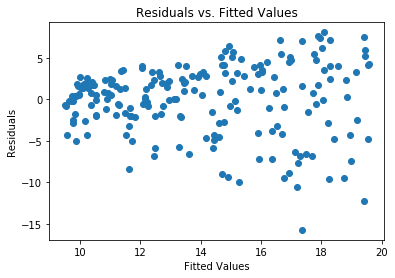

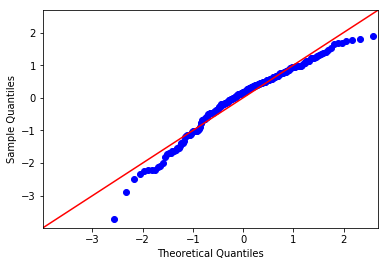

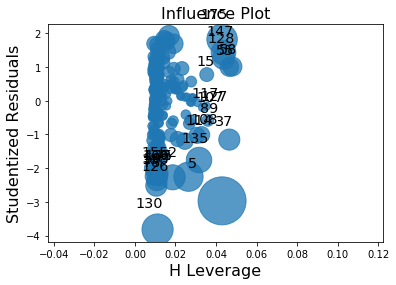

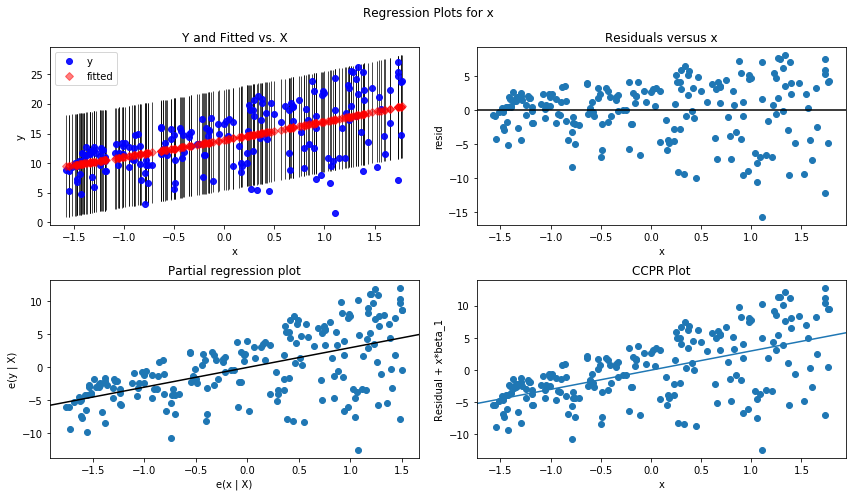

In [48]:
import scipy.stats as stats
import statsmodels.api as statsmodels
from statsmodels.graphics.regressionplots import *

# Residuals vs Fitted Values
residuals = mod_poly.resid
fitted_vals = mod_poly.predict(ad_data['radio_scale'] )
plt.plot(fitted_vals, residuals, 'o')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Create Q-Q Normal Plot of the Residuals
statsmodels.qqplot(residuals, stats.norm, fit=True, line='45')

# Fitted Values vs. Square Root of the Standardized Residuals
standardized_resid = (mod_poly.resid - np.min(mod_poly.resid)) / np.max(mod_poly.resid)

# Leverage Plot (Cook's Distance)
influence_plot(mod_poly)

# Additional stats models plots
fig = plt.figure(figsize=(12, 7))
fig = statsmodels.graphics.plot_regress_exog(mod_poly, "x", fig=fig)

### Linear Regression and Bootstrapping

#### Resample Residuals (Non-Parametric Bootstrapping) for newspaper
The idea is that we want to observe a point at every x-position that we have a point in the original data. So we fit the original data and re-shuffle the residuals at every point. This should be fine because we are assuming that the errors are i.i.d. among our points.

In [49]:
y= ad_data['sales']
x= ad_data['newspaper']
data_df = pd.DataFrame({'x': x, 'y': y})

# Fit linear regression model
ols_model = sm.ols(formula = 'y ~ x', data=data_df)
results = ols_model.fit()

# Get predicted values
y_pred = results.predict(x)

# Get residual values
resids = results.resid

Text(0.5,1,'x vs y')

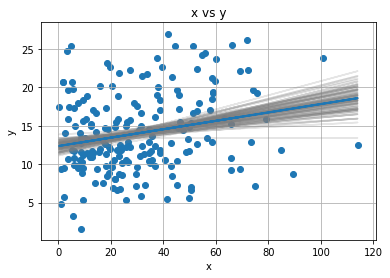

In [50]:
boot2_slopes = []
boot2_interc = []
n_boots = 100
plt.figure()
for _ in range(n_boots):
    # Create a sampling of the residuals with replacement
    boot_resids = np.random.choice(resids, n_points, replace=True)
    y_temp = [y_pred_i + resid_i for y_pred_i, resid_i in zip(y_pred, boot_resids)]
    
    sample_df = pd.DataFrame({'x': list(x), 'y': y_temp})
    # Fit a linear regression
    ols_model_temp = sm.ols(formula = 'y ~ x', data=sample_df)
    results_temp = ols_model_temp.fit()
    
    # Get the intercept and slope, and record it
    boot2_interc.append(results_temp.params[0])
    boot2_slopes.append(results_temp.params[1])
    
    # Plot a greyed out line
    y_pred_temp = ols_model_temp.fit().predict(sample_df['x'])
    plt.plot(sample_df['x'], y_pred_temp, color='grey', alpha=0.2)

# Add points
plt.scatter(x, y)
plt.plot(x, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')

In [51]:
# print the coefficients
results_temp.params

Intercept    11.931070
x             0.061762
dtype: float64

#### Interpreting Model Coefficients
Interpret the  coefficient Newpapaer
A "unit" increase in newspaper ad spending is associated with a 0.061762 "unit" increase in Sales.
Or more clearly: An additional $1,000 spent on newspaper ads is associated with an increase in sales of 61.76 widgets.

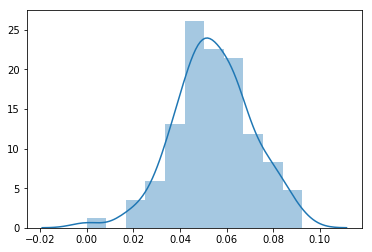

In [52]:
sns.distplot(boot2_slopes)

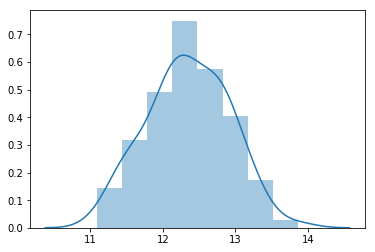

In [53]:
sns.distplot(boot2_interc)

### The final regression(#4) includes all 3 features: (a) TV, (b) radio, and (c) newspaper.

Linear regression is one of the most common techniques for making real numbered predictions from data.

In [54]:
import statsmodels.formula.api as sm
import seaborn as sns

# create a fitted model with all three features
lm = sm.ols(formula='sales ~ TV + radio + newspaper', data=ad_data).fit()

# print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [55]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 17 May 2018   Prob (F-statistic):           1.58e-96
Time:                        17:49:03   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things we learn from this output?

- TV and Radio have significant p-values, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.

- TV and Radio ad spending are both positively associated with Sales, whereas Newspaper ad spending is slightly negatively associated with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)

- This model has a higher R-squared (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.